# EDA (EPL 2020-21)

In [1]:
#Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading dataset
df = pd.read_csv("C:/Users/chira/Desktop/Portfolio/EPL Analaysis/EPL.csv",encoding='latin-1')

In [3]:
df.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   532 non-null    object 
 1   Club                   532 non-null    object 
 2   Nationality            532 non-null    object 
 3   Position               532 non-null    object 
 4   Age                    532 non-null    int64  
 5   Matches                532 non-null    int64  
 6   Starts                 532 non-null    int64  
 7   Mins                   532 non-null    int64  
 8   Goals                  532 non-null    int64  
 9   Assists                532 non-null    int64  
 10  Passes_Attempted       532 non-null    int64  
 11  Perc_Passes_Completed  532 non-null    float64
 12  Penalty_Goals          532 non-null    int64  
 13  Penalty_Attempted      532 non-null    int64  
 14  xG                     532 non-null    float64
 15  xA    

In [5]:
df[df.duplicated()]

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards


In [6]:
df.shape

(532, 18)

# Breaking down things by Club

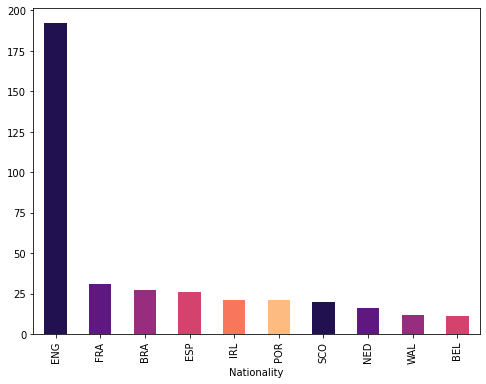

In [7]:
# Major Nationality of players in Epl

Nation = df.groupby('Nationality').size().sort_values(ascending = False)
Nation.head(10).plot(kind = 'bar', figsize=(8,6), color = sns.color_palette("magma"))
plt.show()

In [8]:
# players in EPL based on their age group
under_20 = df[df['Age']<=20]
age21_25 = df[(df['Age']>20) & (df['Age']<=25)]
age26_30 = df[(df['Age']>25) & (df['Age']<=30)]
above_30 = df[df['Age']>30]

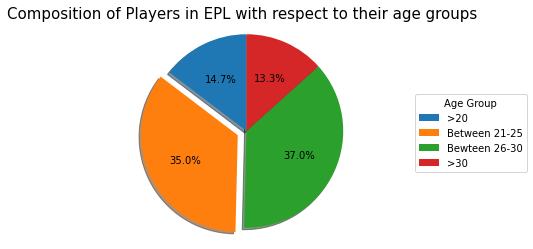

In [9]:
x = np.array([under_20['Name'].count(), age21_25['Name'].count(), age26_30['Name'].count(), above_30['Name'].count()])
label = ['>20', 'Between 21-25', 'Bewteen 26-30', '>30']
explode = (0, 0.1, 0, 0)
fig1, ax1 = plt.subplots()
ax1.pie(x, explode=explode, labels=label, autopct='%1.1f%%', shadow=True, startangle=90,labeldistance = None)
ax1.legend(label, title="Age Group", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
ax1.set_title("Composition of Players in EPL with respect to their age groups", fontsize = 15)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

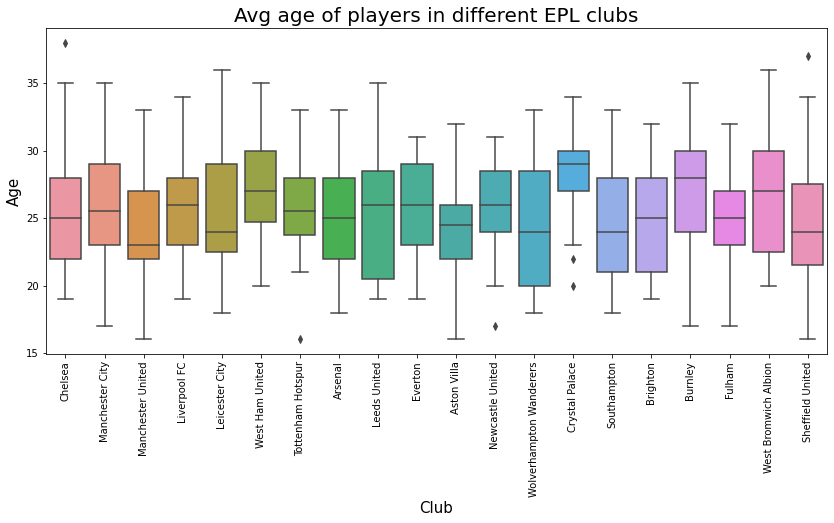

In [10]:
# Average Age of players in EPL Clubs
avg = df.groupby('Club')['Age'].mean()

plt.figure(figsize=(14,6))
plt.title('Avg age of players in different EPL clubs', fontsize = 20)
sns.boxplot(x = 'Club', y = 'Age', data = df)
plt.xlabel(xlabel = 'Club', fontsize = 15)
plt.ylabel(ylabel = 'Age', fontsize = 15)
plt.xticks(rotation = 'vertical')
plt.show()

In [11]:
#Number of players in each EPL Club
num_p = df['Club'].value_counts()
num_p

West Bromwich Albion       30
Manchester United          29
Arsenal                    29
Southampton                29
Everton                    29
Liverpool FC               28
Fulham                     28
Chelsea                    27
Newcastle United           27
Brighton                   27
Wolverhampton Wanderers    27
Sheffield United           27
Leicester City             27
Burnley                    25
Manchester City            24
Crystal Palace             24
Tottenham Hotspur          24
West Ham United            24
Aston Villa                24
Leeds United               23
Name: Club, dtype: int64

In [12]:
#Total goals scored in EPL 2020-21
goals = df['Goals'].sum()
#goals #986

#breaking down by clubs
goals_by_club = df.groupby(['Club'], as_index = False)['Goals'].sum().sort_values(['Goals'],ascending = False)
goals_by_club

,Club,Goals
11,Manchester City,82
12,Manchester United,70
16,Tottenham Hotspur,66
10,Liverpool FC,65
9,Leicester City,64
8,Leeds United,60
18,West Ham United,60
4,Chelsea,56
0,Arsenal,53
1,Aston Villa,52


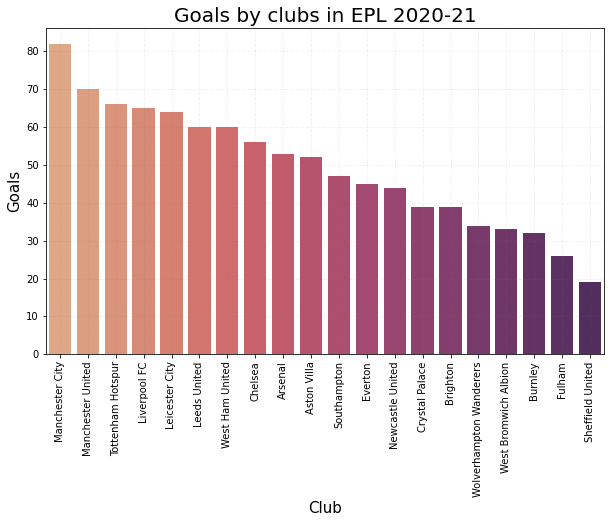

In [13]:
plt.figure(figsize = (10,6))
sns.barplot(x = goals_by_club['Club'], y =goals_by_club['Goals'], palette ='flare')
plt.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.2)
plt.xticks(rotation = 'vertical')
plt.xlabel(xlabel = 'Club', fontsize = 15)
plt.ylabel(ylabel = 'Goals', fontsize = 15)
plt.title('Goals by clubs in EPL 2020-21', fontsize = 20)
plt.show()

In [14]:
#Penalty stats by clubs
penalty_by_club =df.groupby(['Club'], as_index =False)[['Penalty_Attempted','Penalty_Goals']].sum().sort_values(['Penalty_Goals','Penalty_Attempted'], ascending = [False,False])
penalty_by_club

,Club,Penalty_Attempted,Penalty_Goals
9,Leicester City,12,10
12,Manchester United,11,10
4,Chelsea,10,8
2,Brighton,9,6
13,Newcastle United,7,6
0,Arsenal,6,6
10,Liverpool FC,6,6
11,Manchester City,9,5
1,Aston Villa,6,5
15,Southampton,6,5


# Breaking stats down by players

In [15]:
# Adding a new column Minutes_played/match
df['Mins_per_Match'] = (df['Mins']/df['Matches']).astype('int64')

In [16]:
df.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,Mins_per_Match
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0,80
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0,88
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0,74
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0,84
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0,74


In [17]:
#Most Goals in EPL 2020-21 season

most_goals = df.groupby(['Name'], as_index = False)[['Matches', 'Goals']].sum()
most_goals = most_goals.sort_values(by = ['Goals', 'Matches'], ascending = [False, True]).head(10)

In [18]:
most_goals

,Name,Matches,Goals
185,Harry Kane,35,23
356,Mohamed Salah,37,22
70,Bruno Fernandes,37,18
465,Son Heung-min,37,17
400,Patrick Bamford,38,17
130,Dominic Calvert-Lewin,33,16
225,Jamie Vardy,34,15
390,Ollie Watkins,37,14
522,Ä°lkay GÃ¼ndoÄan,28,13
20,Alexandre Lacazette,31,13


C:\Users\chira\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 159 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chira\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 159 missing from current font.
  font.set_text(s, 0, flags=flags)


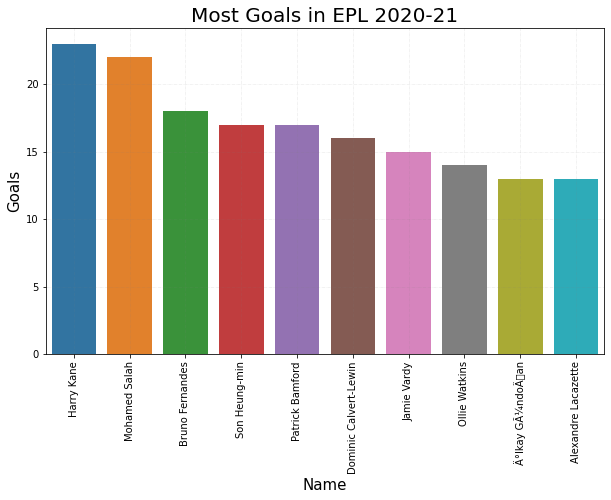

In [19]:
plt.figure(figsize = (10,6))
sns.barplot(x = most_goals['Name'], y =most_goals['Goals'])
plt.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.2)
plt.xticks(rotation = 'vertical')
plt.xlabel(xlabel = 'Name', fontsize = 15)
plt.ylabel(ylabel = 'Goals', fontsize = 15)
plt.title('Most Goals in EPL 2020-21', fontsize = 20)
plt.show()

In [20]:
# Most assists in EPL 2020-21

most_assists = df.groupby(['Name'], as_index = False)[['Matches', 'Assists']].sum()
most_assists = most_assists.sort_values(['Assists', 'Matches'], ascending = [False, True]).head(10)

In [21]:
most_assists

,Name,Matches,Assists
185,Harry Kane,35,14
288,Kevin De Bruyne,25,12
70,Bruno Fernandes,37,12
202,Jack Grealish,26,10
465,Son Heung-min,37,10
413,Raphael Dias Belloli,30,9
225,Jamie Vardy,34,9
321,Marcus Rashford,37,9
398,Pascal GroÃ,34,8
483,Timo Werner,35,8


C:\Users\chira\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 159 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chira\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 159 missing from current font.
  font.set_text(s, 0, flags=flags)


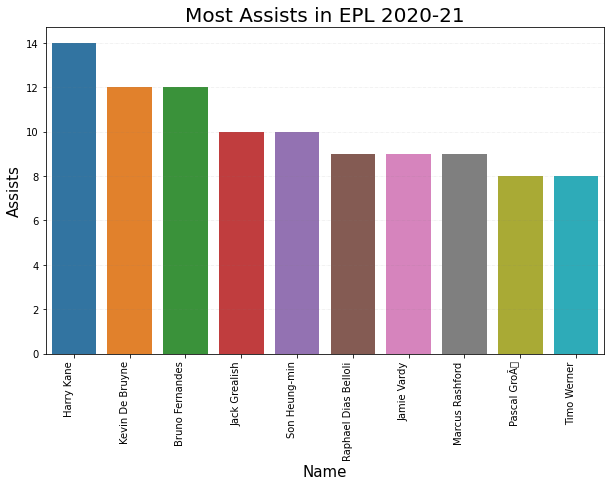

In [22]:
plt.rcParams["figure.figsize"] = [10,6]
plt.title('Most Assists in EPL 2020-21', fontsize = 20)
plt.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.2)
sns.barplot(x =most_assists['Name'] , y = most_assists['Assists'])
plt.xlabel('Name', fontsize = 15)
plt.ylabel('Assists', fontsize = 15)
plt.xticks(rotation = 90, ha = 'right')

plt.show()

In [23]:
# Top 10 players with most yellow cards and red cards
#df.head()
cards_recieved = df.groupby(['Name'], as_index = False)[['Matches', 'Yellow_Cards','Red_Cards']].sum()
cards_recieved = cards_recieved.sort_values(['Yellow_Cards', 'Red_Cards', 'Matches'], ascending = [False, False, True]).head(10)

In [24]:
cards_recieved

,Name,Matches,Yellow_Cards,Red_Cards
252,John McGinn,37,12,0
93,Conor Gallagher,30,11,0
186,Harry Maguire,34,11,0
132,Douglas Luiz,33,10,1
277,Kalvin Phillips,29,10,0
331,Mason Holgate,28,9,0
410,Pierre HÃ¸jbjerg,38,9,0
251,John Lundstram,28,8,1
343,Matty Cash,28,8,1
312,Luka MilivojeviÄ,31,8,1


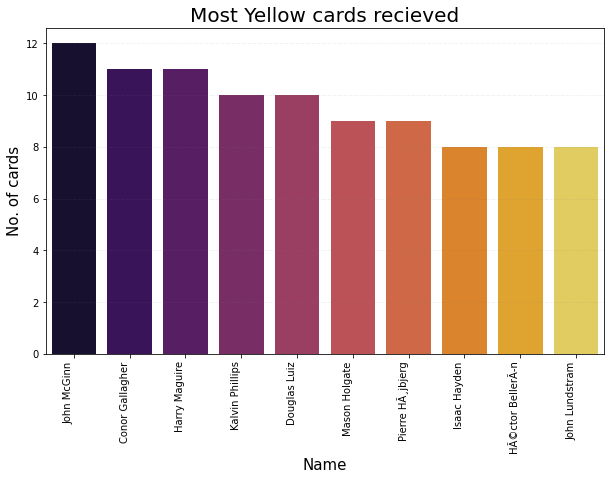

In [25]:
only_y = df.groupby(['Name'], as_index = False)[['Matches', 'Yellow_Cards']].sum()
only_y = only_y.sort_values(['Yellow_Cards','Matches'], ascending = [False, True]).head(10)

plt.rcParams["figure.figsize"] = [10,6]
plt.title('Most Yellow cards recieved', fontsize = 20)
plt.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.2)
sns.barplot(x = only_y.Name, y = only_y.Yellow_Cards, palette = 'inferno')
plt.xlabel('Name', fontsize = 15)
plt.ylabel('No. of cards', fontsize = 15)
plt.xticks(rotation = 90, ha = 'right')

plt.show()

In [26]:
#Penalty stats

#Creating a new column
df['penalty_conversion_rate'] = (df['Penalty_Goals']/df['Penalty_Attempted'])*100
df['penalty_conversion_rate'] = df['penalty_conversion_rate'].fillna(0)

penalty_by_player = df.groupby(['Name'], as_index =False)[['Penalty_Attempted','Penalty_Goals','penalty_conversion_rate']].sum().sort_values(['Penalty_Attempted'], ascending = [False]).head(10)
penalty_by_player

,Name,Penalty_Attempted,Penalty_Goals,penalty_conversion_rate
70,Bruno Fernandes,10,9,90.000000
262,Jorginho,9,7,77.777778
225,Jamie Vardy,9,8,88.888889
356,Mohamed Salah,6,6,100.000000
44,Anwar El Ghazi,4,4,100.000000
398,Pascal GroÃ,4,3,75.000000
372,Neal Maupay,4,3,75.000000
179,Gylfi SigurÃ°sson,4,3,75.000000
185,Harry Kane,4,4,100.000000
335,Matheus Pereira,4,4,100.000000


                  Name    xG    xA
43   Antwoine Hackford  1.16  0.00
225        Jamie Vardy  0.62  0.16
356      Mohamed Salah  0.61  0.18
401    Patrick Cutrone  0.61  0.00
185         Harry Kane  0.60  0.22
389     Olivier Giroud  0.58  0.09
473      Tammy Abraham  0.56  0.07
458      Sergio Agüero  0.54  0.21
328         Martinelli  0.53  0.32
128         Diogo Jota  0.53  0.13


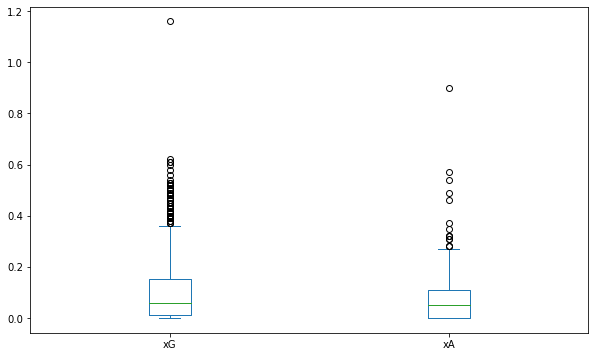

In [27]:
#Top 10 players with highest xG
xG_xA= df.groupby(['Name'], as_index = False)[['xG', 'xA']].sum().sort_values(by = ['xG','xA'], ascending = [False,False]).head(10)
print(xG_xA)
xG_xA= df.groupby(['Name'], as_index = False)[['xG', 'xA']].sum().sort_values(by = ['xG','xA'], ascending = [False,False]).plot(kind = 'box')
# We have some outliers in this column

                Name    xG    xA
225      Jamie Vardy  0.62  0.16
356    Mohamed Salah  0.61  0.18
401  Patrick Cutrone  0.61  0.00
185       Harry Kane  0.60  0.22
389   Olivier Giroud  0.58  0.09
473    Tammy Abraham  0.56  0.07
458    Sergio Agüero  0.54  0.21
328       Martinelli  0.53  0.32
128       Diogo Jota  0.53  0.13
265        Josh Maja  0.53  0.12


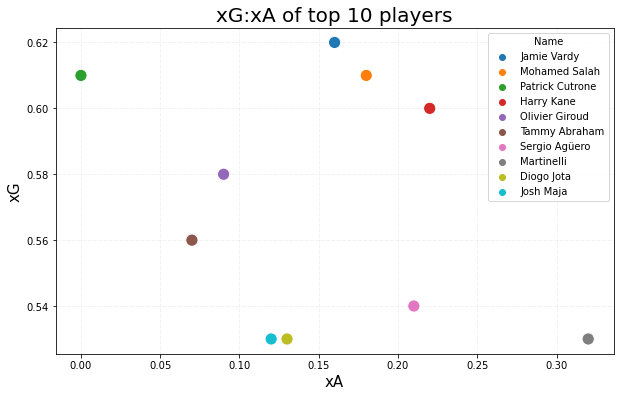

In [28]:
new_xG_xA = xG_xA= df.groupby(['Name'], as_index = False)[['xG', 'xA']].sum().sort_values(by = ['xG','xA'], ascending = [False,False])[1:11]
print(new_xG_xA)

sns.scatterplot(x = 'xA', y = 'xG', hue = 'Name', data = new_xG_xA, s = 150)
plt.grid(True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.2)
plt.title('xG:xA of top 10 players', fontsize = 20)
plt.xlabel('xA', fontsize = 15)
plt.ylabel('xG', fontsize = 15)
plt.show()

In [29]:
df.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,Mins_per_Match,penalty_conversion_rate
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0,80,100.0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0,88,0.0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0,74,0.0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0,84,0.0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0,74,0.0
